# Week 3: Unsupervised Learning & Clustering

## Lecture Outline

1. **Introduction to Unsupervised Learning**
   - **Basics of Unsupervised Learning:** An introduction to machine learning without labeled data, exploring how algorithms can identify patterns and structures in data on their own.
   - **Different Types of Unsupervised Learning:** A brief overview of clustering, dimensionality reduction, and association rule learning, setting the stage for deeper dives into these areas.
   - **Real-world Applications:** Discussion on the significance of unsupervised learning across various domains. Examples will be provided to demonstrate its impact on sectors such as marketing, biology, and fraud detection, highlighting the versatility and power of unsupervised techniques.

2. **Exploring Data with Clustering**
   - **Introduction to Clustering:** Basics of clustering and why it's a crucial unsupervised learning technique. This section covers how clustering algorithms seek to group data points into clusters based on similarity.
   - **Types of Clustering:** Overview of Hierarchical Clustering, K-Means Clustering, and DBSCAN, highlighting the characteristics that differentiate these methods.
   - **Real-world Examples:** Discussing the application of clustering in customer segmentation, anomaly detection, and other areas. This will help illustrate how clustering offers practical solutions to complex problems.

3. **Deep Dive into K-Means Clustering**
   - **Introduction to K-Means:** A detailed explanation of the K-Means clustering algorithm, including its working principles and how it optimizes cluster formation.
   - **Choosing the Right Number of Clusters:** Discussing methods like the elbow method and silhouette score to determine the optimal number of clusters, critical for the success of K-Means applications.
   - **Implementation:** Walkthrough of a basic implementation using Python and NumPy, reinforcing the algorithm's concepts through hands-on coding.
   - **Model Evaluation:** How to use metrics like inertia and silhouette score to evaluate the performance of a K-Means model, ensuring that learners understand how to measure clustering effectiveness.

4. **Dimensionality Reduction Explained**
   - **Introduction to the Idea:** Discussing the concept of dimensionality reduction and why it's essential for dealing with high-dimensional data in unsupervised learning.
   - **PCA, t-SNE, and UMAP Basics:** Introducing popular dimensionality reduction techniques, explaining how each works, and discussing their advantages and drawbacks. This section aims to provide a foundation for understanding how these methods help simplify data without losing critical information.
   - **Implementing PCA:** A step-by-step guide on implementing Principal Component Analysis (PCA), a fundamental dimensionality reduction technique, with Python. This practical exercise will solidify learners' understanding of how PCA can be used to enhance data analysis.

## Basics of Unsupervised Learning
- Unsupervised learning is a type of machine learning where the algorithm learns patterns and structures from unlabeled data
- No explicit "right answers" or target outputs are provided during training
- The model must discover interesting features and relationships in the data on its own
- Useful for exploring data, finding hidden patterns, and gaining insights when labels are unavailable or expensive to obtain

```{dropdown} For Plot Below
- What do you notice about the data. Any groups or patterns?
- This is what unsupervised learning algorithms aim to find automatically
```

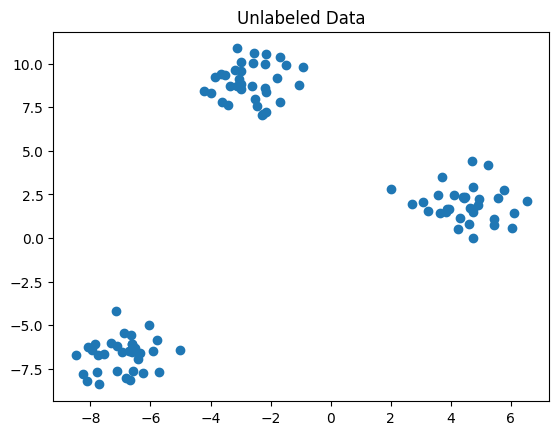

In [1]:
# Generate a synthetic dataset with hidden patterns
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Visualize the unlabeled data
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.title("Unlabeled Data")
plt.show()

## Different Types of Unsupervised Learning
- Three main categories of unsupervised learning algorithms:
  1. Clustering: Group similar data points together into clusters
  2. Dimensionality Reduction: Reduce the number of features while preserving important structure 
  3. Association Rule Learning: Discover rules that describe large portions of your data
- Each type solves different problems and provides unique insights into the data

```{dropdown} Quiz
Which of the following is NOT a type of unsupervised learning?
a) Clustering
b) Dimensionality Reduction 
c) Regression
d) Association Rule Learning
```

```{dropdown} Answer
c) Regression
```

## Real-world Applications
- Unsupervised learning has diverse applications across many fields:
  - Marketing: Customer segmentation, identifying purchasing patterns
  - Biology: Discovering subtypes of cells, clustering genes with similar expression profiles
  - Anomaly Detection: Finding unusual data points that may indicate fraud or errors, i.e Flag unusual credit card transactions
  - Recommender Systems: Identifying similar users or items for personalized recommendations

# Exploring Data with Clustering

## Introduction to Clustering
- Automatically group similar data points together
- Each group is called a "cluster"
- Points in different clusters should be dissimilar
- Enables discovery of natural groupings and structures in the data
- Useful for customer segmentation, anomaly detection, data compression, and more

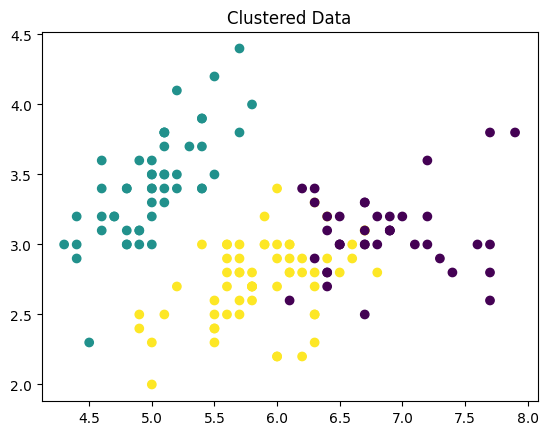

In [31]:
from sklearn.cluster import KMeans

# Cluster the data into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize the clustered data
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Clustered Data")
plt.show()

## Types of Clustering Algorithms
- Hierarchical Clustering: 
  - Builds a tree-like structure of nested clusters
  - Can be agglomerative (bottom-up) or divisive (top-down)
  - Provides a visual representation of the clustering hierarchy

![image.png](https://images.datacamp.com/image/upload/v1674149819/Dendrogram_of_Agglomerative_Clustering_Approach_4eba3586ec.png)
![](https://miro.medium.com/v2/resize:fit:1400/1*1O7uNCBALn5T92lMPt76oA.png)

- K-Means Clustering:
  - Partitions data into K clusters 
  - Iteratively refines cluster assignments to minimize within-cluster variance
  - Fast and scalable, but requires specifying K upfront
  - Algorithm steps:
    1. Randomly initialize K cluster centroids
    2. Assign each point to the closest centroid
    3. Move the centroids to the mean of their assigned points
    4. Repeat steps 2-3 until centroids stop moving

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)
  
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
  - Defines clusters as areas of high density separated by areas of low density
    - Density: Number of points within a specified radius
  - Can discover clusters of arbitrary shape and handle noise/outliers
  - Does not require specifying the number of clusters upfront, but requires setting two parameters: epsilon (radius) and min_samples (minimum number of points in a cluster)

![](https://www.researchgate.net/publication/342141592/figure/fig4/AS:901775972380681@1592011554293/An-Example-Illustrating-the-Density-Based-DBSCAN-Clustering-Method-Applied-to-SMLM-Data.png)

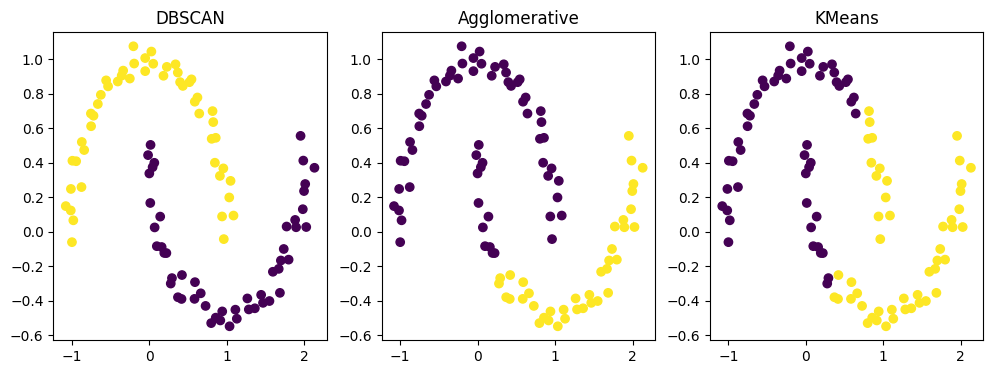

In [32]:
# Comparing kmeans, DBSCAN, and Agglomerative clustering on synthetic data and plotting the results
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_moons
import numpy as np

dbscan = DBSCAN(eps=0.4)
agglomerative = AgglomerativeClustering(n_clusters=2)
kmeans = KMeans(n_clusters=2)

X, _ = make_moons(n_samples=100, noise=0.05, random_state=42)

dbscan_labels = dbscan.fit_predict(X)
agglomerative_labels = agglomerative.fit_predict(X)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=dbscan_labels)
plt.title("DBSCAN")

plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=agglomerative_labels)
plt.title("Agglomerative")

plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels)
plt.title("KMeans")

plt.show()


```{dropdown} Group Coding Exercise
- Use a clustering algorithm to group the Iris flower dataset into clusters.
- Experiment with different algorithms and parameters we just saw above. Compare the results.
- Can you interpret what the clusters represent? How do the algorithms differ?

You can use the cell below to start coding.
```

In [33]:
# Load the iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data # we are only interested in the features since this is unsupervised learning

# Let's see how the data looks like
import pandas as pd

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


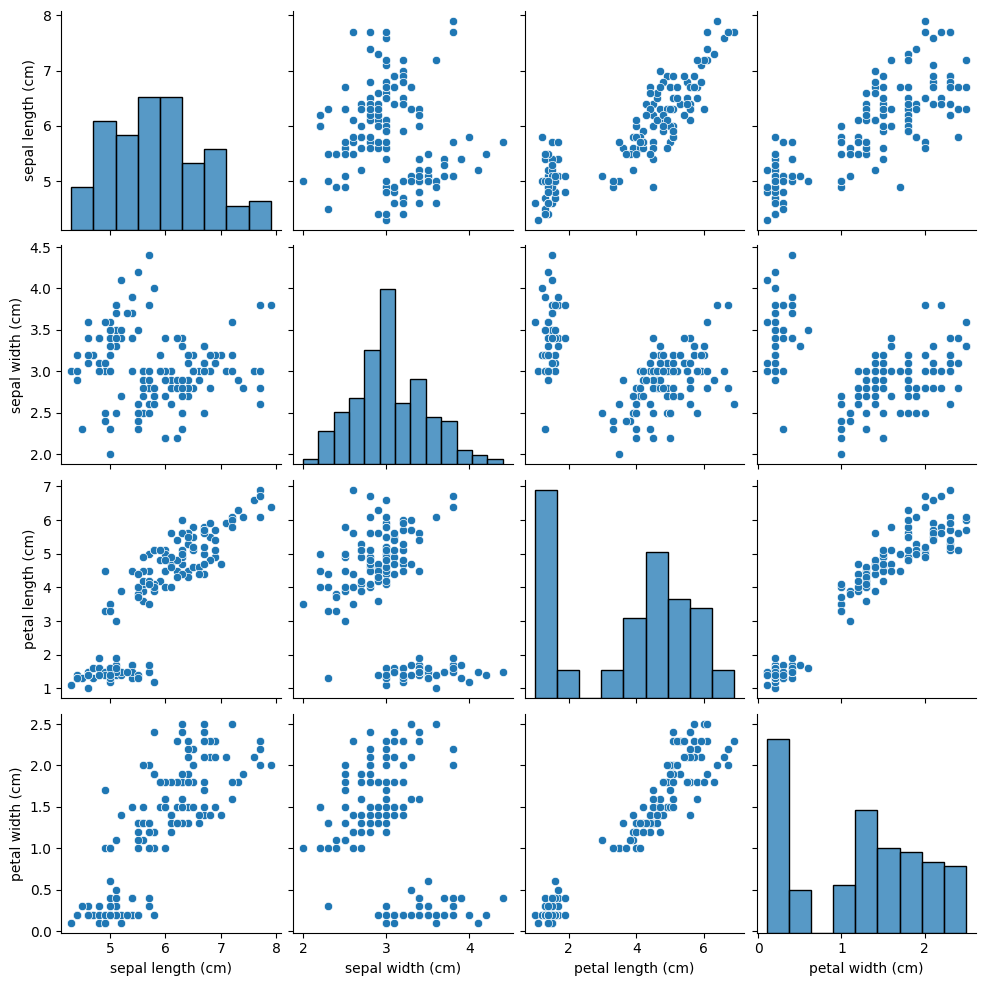

In [34]:
# Visualize the data
import seaborn as sns
from matplotlib import pyplot as plt

sns.pairplot(df)
plt.show()

In [35]:
# Your turn! Experiment with clustering here...

```{dropdown} Quiz
- How does clustering differ from classification?
- What are the main types of clustering algorithms and how do they differ?
```

# Deep Dive into K-Means Clustering

## Introduction to K-Means
- One of the most popular and widely used clustering algorithms
- Partitions data into K clusters, each represented by its centroid (mean)
- Centroid is the average of all points in the cluster
- Aims to minimize the sum of squared distances between points and their centroid
- Iterative algorithm that alternates between:
    1. Assigning points to closest centroid
    2. Updating centroids as mean of points in the cluster
- Converges when cluster assignments no longer change

## Big Task

- Implement the K-Means algorithm from scratch in Python.

### Implementing K-Means
- Basic steps of the K-Means algorithm:
    1. Choose K and initialize K centroids randomly
    2. Repeat until convergence:
        - Assign each point to closest centroid
        - Update centroids as mean of points in the cluster
- Convergence reached when cluster assignments no longer change or max iterations reached.
    - Convergenece word in  ML means that the model has learned the patterns in the data and is not changing much anymore.
- Relatively simple to implement from scratch!

- Below you are given a boilerplate code to get you started. Fill in the missing parts to complete the implementation. They are indicated by TODO comments.

In [ ]:
import numpy as np

def calculate_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Example usage:
    distance = calculate_distance(np.array([1, 2]), np.array([4, 6]))
    print(distance)  # This will print the distance between the two points.

    Parameters:
    - point1: An array of coordinates for the first point.
    - point2: An array of coordinates for the second point.

    Returns:
    - The Euclidean distance between point1 and point2.

    Note: The Euclidean distance is the square root of the sum of the squared differences
    in each dimension.
    """
    # TODO: Implement the Euclidean distance calculation.
    # Hint: Use numpy operations to calculate the sum of squared differences.
    #       Then, use np.sqrt to find the square root.
    distance = None  # Replace None with your implementation.
    return distance

def assign_points_to_clusters(centroids, data):
    """
    Assign each data point to the nearest centroid's cluster.

    Example usage:
    centroids = np.array([[1, 2], [4, 5]])
    data = np.array([[1, 1], [2, 2], [5, 5]])
    clusters = assign_points_to_clusters(centroids, data)
    print(clusters)  # This will print the index of the nearest centroid for each data point.

    Parameters:
    - centroids: An array of current centroid positions.
    - data: The dataset of points to be clustered.

    Returns:
    - A list of cluster indices. Each element corresponds to the cluster assignment
      of the data point at the same index in the input dataset.

    Note: This function should call `calculate_distance` for each (point, centroid)
    combination to find the nearest centroid for every data point.
    """
    clusters = []
    for point in data:
        # TODO: Calculate the distance from this point to each centroid.
        #       Store each distance and use it to find the index of the
        #       closest centroid.
        closest_centroid_index = None  # Replace None with your implementation.
        clusters.append(closest_centroid_index)
    return clusters

def calculate_new_centroids(clusters, data, k):
    """
    Calculate new centroids as the mean position of all points assigned to each cluster.

    Example usage:
    clusters = [0, 0, 1]  # Assume two points belong to cluster 0, and one belongs to cluster 1.
    data = np.array([[1, 1], [2, 2], [5, 5]])
    k = 2  # Number of clusters
    new_centroids = calculate_new_centroids(clusters, data, k)
    print(new_centroids)  # This will print the new centroid positions.

    Parameters:
    - clusters: A list of cluster assignments for each data point in 'data'.
    - data: The dataset of points being clustered.
    - k: The number of clusters.

    Returns:
    - A new array of centroids after recalculating their positions.

    Note: For each cluster, find all points assigned to it, then calculate the mean
    position of those points to find the new centroid.
    """
    new_centroids = []
    for i in range(k):
        # TODO: Extract points assigned to the current cluster.
        #       Calculate the mean of these points to find the new centroid.
        centroid = None  # Replace None with your implementation.
        new_centroids.append(centroid)
    return new_centroids

def kmeans(data, k, iterations):
    """
    The k-means clustering algorithm.

    Example usage:
    data = np.random.rand(100, 2)  # Generate some random data
    k = 3  # Number of clusters
    iterations = 10  # Number of iterations to run the algorithm
    clusters, centroids = kmeans(data, k, iterations)
    print("Final Centroids:", centroids)

    Parameters:
    - data: The dataset to be clustered.
    - k: The number of clusters to form.
    - iterations: The number of times the algorithm should run.

    Returns:
    - clusters: A list of cluster assignments for each data point.
    - centroids: The final positions of the centroids.

    Note: The algorithm initializes centroids randomly, then iteratively assigns points
    to the nearest centroid and recalculates centroids until the specified number
    of iterations is reached.
    """
    # Initialize centroids randomly from the data points
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]

    for iteration in range(iterations):
        # Step 1: Assign points to their nearest centroid
        clusters = assign_points_to_clusters(centroids, data)

        # Step 2: Recalculate the centroids based on the current cluster assignments
        centroids = calculate_new_centroids(clusters, data, k)

    return clusters, centroids

In [ ]:
# Example usage
# Generate some random data run our kmeans implementation and plot the final centroids
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

k = 3
iterations = 10

clusters, centroids = kmeans(data, k, iterations)

plt.scatter(data[:,0], data[:,1], c=clusters)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='r', marker='x', s=100)
plt.title("KMeans Clustering")
plt.show()

## Choosing the Number of Clusters K
- K-Means requires specifying the number of clusters K upfront
- Choosing K is often tricky in practice, requires domain knowledge and experimentation
- Common heuristics:
    - Elbow Method: Plot sum of squared distances vs. K, look for an "elbow" where the rate of decrease slows
    - Silhouette Analysis: Measures how well samples are clustered based on distance to own vs. other clusters
- In reality, there may not always be a single "best" K, depends on application and desired granularity

![](https://dchandra.com/images/output_18_1.png)

Text(0.5, 1.0, 'K vs. Inertia')

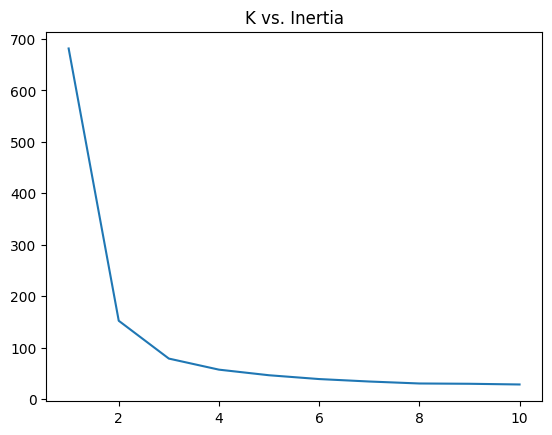

In [26]:
# testing iris dataset with kmeans 1-10 as k
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# Try different values of k and plot the inertia
# inertia is the sum of squared distances of samples to their closest cluster center
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("K vs. Inertia")

## Evaluating K-Means Clustering
- Evaluating clustering results is more subjective than supervised learning
- Common metrics:
    - Inertia: Sum of squared distances of points to their closest centroid (lower is better)
    - Silhouette Score: Measures how close points are to own cluster vs. other clusters (-1 to 1, higher is better)
- Best to use multiple evaluation metrics and also visually inspect the clusters when possible
- Domain knowledge is key - clusters should align with meaningful categories for the application

```{dropdown} Group Coding & Discussion Exercise
- Continuing with the Iris example, compare the inertia and silhouette scores for different K
- Visualize the clusters for the chosen K, color-coded by species
- Discuss: Do the evaluation metrics align with the visual clusters? What do the clusters represent?
```

```{dropdown} Quiz
- What are the key steps of the K-Means algorithm? What does it optimize?
- How would you choose K for a new clustering problem?
- What metrics can you use to evaluate the quality of a K-Means clustering?
```

# Dimensionality Reduction Explained

## Introduction to Dimensionality Reduction
- High-dimensional data (many features) can be difficult to work with
    - Curse of dimensionality: Complexity grows exponentially with dimensions
    - Hard to visualize, analyze, store and process high-dimensional data
- This is like trying to understand a 3D object by looking at its 2D shadow
- **Dimensionality reduction techniques aim to reduce the number of features while preserving important structure**
- Enables compression, visualization, faster processing, and simpler models
- Key idea: Often data lies close to a lower-dimensional subspace or manifold
    - E.g. A coiled-up sheet of paper is 2D but appears 3D
    - Dimensionality reduction aims to find and "unroll" this lower-dimensional structure

## PCA, t-SNE, and UMAP Basics
- There are several popular dimensionality reduction techniques:
  - Principal Component Analysis (PCA): 
    - Principal Component Analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. 
    - Like finding a new perspective to look at data that makes the **most important aspects (variations)** clearer.
    - It can improve the performance of machine learning models by eliminating redundant features.
  - t-Distributed Stochastic Neighbor Embedding (t-SNE):
    - Non-linear technique that preserves local structure in the data
    - Minimizes the divergence between pairwise similarities in the original and reduced spaces
    - Useful for visualizing high-dimensional data in 2-3 dimensions
- Each technique has its own strengths and weaknesses, and the choice depends on the goals and characteristics of the data
- In practice, it's often helpful to experiment with multiple techniques and compare the resulting embeddings

Text(0.5, 1.0, 'PCA')

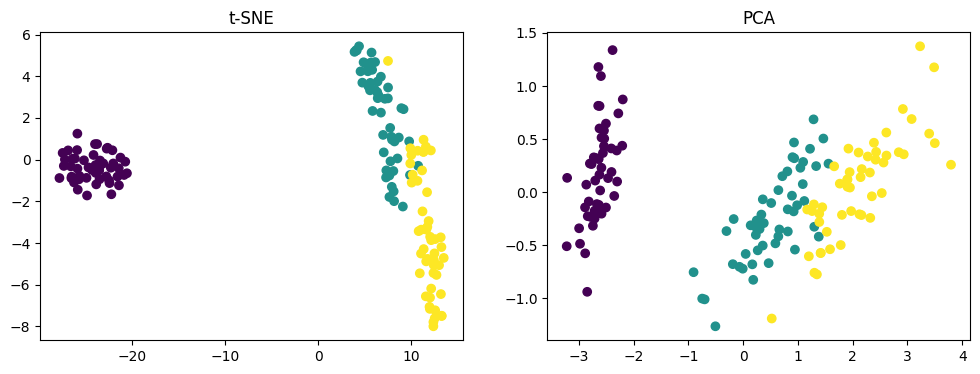

In [30]:
# Running t-SNE and PCA on the iris dataset and comparing the results
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

tsne = TSNE(n_components=2, random_state=42)
pca = PCA(n_components=2)

X_tsne = tsne.fit_transform(X)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=iris.target)
plt.title("t-SNE")

plt.subplot(122)
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
plt.title("PCA")